# PERFECT CITY FOR OPENING A CAFÉ BAR

## FIRST, WE IMPORT THE MOST BASIC LIBRARIES

In [2]:
import pandas as pd
!pip install wikipedia
import wikipedia as wp
!pip install lxml
import lxml

     |████████████████████████████████| 112kB 5.9MB/s eta 0:00:01
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/87/2a/18/4e471fd96d12114d16fe4a446d00c3b38fb9efcb744bd31f4a
Successfully built wikipedia
     |████████████████████████████████| 5.8MB 6.2MB/s eta 0:00:01     |██████████▌                     | 1.9MB 6.2MB/s eta 0:00:01


## SECOND STEP IS TO IMPORT THE LIST OF BIGGEST EUROPEAN CITIES FROM WIKIPEDIA. WE USE THE COMBINATION OF PANDAS AND WIKIPEDIA LIBRARIES

In [3]:
link = wp.page('List of European cities by population within city limits').html().encode("UTF-8")
cities = pd.read_html(link)[0]
cities.head()

,Unnamed: 0,City,Country,Officialpopulation,Date,2011 Eurostatpopulation[1],Image,Location,Ref.
0,1,Istanbul[a],Turkey,"15,519,267[2]",31 December 2019,NaN,NaN,41Â°00â²49â³N 28Â°57â²18â³E﻿ / ﻿41.013611Â...,[3]
1,2,Moscow[b],Russia,12615279,1 January 2019,NaN,NaN,55Â°45â²00â³N 37Â°37â²00â³E﻿ / ﻿55.75Â°N 3...,[4]
2,3,London,United Kingdom,9126366,31 December 2018,8173941.0,NaN,51Â°30â²26â³N 0Â°07â²39â³W﻿ / ﻿51.507222Â°...,[5]
3,4,Saint Petersburg,Russia,5383890,1 January 2019,NaN,NaN,59Â°57â²N 30Â°18â²E﻿ / ﻿59.95Â°N 30.3Â°E,[6][7]
4,5,Berlin,Germany,3748148,31 December 2018,3460725.0,NaN,52Â°31â²00â³N 13Â°23â²00â³E﻿ / ﻿52.516667Â...,[8]


## NOW WE MUST REMOVE THE UNNECESSARY COLUMNS

In [4]:
cities = cities.drop(columns=['Date', '2011 Eurostatpopulation[1]', 'Image', 'Location', 'Ref.'], axis = 1)

In [5]:
cities.head()

,Unnamed: 0,City,Country,Officialpopulation
0,1,Istanbul[a],Turkey,"15,519,267[2]"
1,2,Moscow[b],Russia,12615279
2,3,London,United Kingdom,9126366
3,4,Saint Petersburg,Russia,5383890
4,5,Berlin,Germany,3748148


## WE RENAME COLUMNS FOR AN EASE OF USE

In [6]:
cities = cities.rename(columns={"Unnamed: 0": "Rank", "Officialpopulation" : "Population"})
cities

,Rank,City,Country,Population
0,1,Istanbul[a],Turkey,"15,519,267[2]"
1,2,Moscow[b],Russia,12615279
2,3,London,United Kingdom,9126366
3,4,Saint Petersburg,Russia,5383890
4,5,Berlin,Germany,3748148
5,6,Madrid,Spain,3223334
6,7,Kiev,Ukraine,2950800
7,8,Rome,Italy,2844750
8,9,Paris,France,2140526
9,10,Bucharest,Romania,2106144


## FIX THE INADEQUATE VALUES

In [7]:
cities = cities.replace({'Istanbul[a]':'Istanbul', 'Moscow[b]':'Moscow', 'TekirdaÄ': 'Tekirdag'})

In [8]:
cities = cities.replace({'15,519,267[2]':'15519267'})

## TRANSFORM THE POPULATION COLUMN FROM STRING TO INTEGER

In [9]:
cities['Population'] = cities['Population'].astype(int)

In [10]:
cities.head()

,Rank,City,Country,Population
0,1,Istanbul,Turkey,15519267
1,2,Moscow,Russia,12615279
2,3,London,United Kingdom,9126366
3,4,Saint Petersburg,Russia,5383890
4,5,Berlin,Germany,3748148


## INSTALL AND IMPORT GEOGRAPHIC LIBRARIES

In [11]:
!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-1.21.0               |             py_0          58 KB  conda-forge
    openssl-1.1.1g             |       h516909a_0         2.1 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.2 MB

The following NEW packages will be INSTALLED:

  geographiclib      conda-forge/noarch::geographiclib-1.50-py_0
  geopy              conda-forge/noarch::geopy-1.21.0-py_0

The following packages will be UPDATED:

  openssl                                 1.1.1f-h516909a_0 --> 1.1.1g-h516909a_0



openssl-1.1.1g       | 2.1 MB    | ############

## FIND COORDINATES FOR ALL THE CITIES IN OUR DATAFRAME

In [12]:
locator = Nominatim(user_agent="myGeocoder")
location = locator.geocode("Berlin, Germany")
from geopy.extra.rate_limiter import RateLimiter

In [13]:
geocode = RateLimiter(locator.geocode, min_delay_seconds =1)
cities['location'] = cities['City'].apply(geocode)
cities['point'] = cities['location'].apply(lambda loc: tuple(loc.point) if loc else None)
cities[['latitude', 'longitude', 'altitude']] = pd.DataFrame(cities['point'].tolist(), index = cities.index)

In [14]:
cities.head()

,Rank,City,Country,Population,location,point,latitude,longitude,altitude
0,1,Istanbul,Turkey,15519267,"(İstanbul, Fatih, İstanbul, Marmara Bölgesi, 3...","(41.0096334, 28.9651646, 0.0)",41.009633,28.965165,0.0
1,2,Moscow,Russia,12615279,"(Москва, Центральный федеральный округ, Россия...","(55.4792046, 37.3273304, 0.0)",55.479205,37.327330,0.0
2,3,London,United Kingdom,9126366,"(London, Greater London, England, SW1A 2DX, Un...","(51.5073219, -0.1276474, 0.0)",51.507322,-0.127647,0.0
3,4,Saint Petersburg,Russia,5383890,"(Санкт-Петербург, Северо-Западный федеральный ...","(59.9606739, 30.1586551, 0.0)",59.960674,30.158655,0.0
4,5,Berlin,Germany,3748148,"(Berlin, Deutschland, (52.5170365, 13.3888599))","(52.5170365, 13.3888599, 0.0)",52.517037,13.388860,0.0


## DROP THE UNNECESSARY COLUMNS FROM OUR DATAFRAME

In [15]:
cities = cities.drop(columns=['location', 'point', 'altitude'], axis = 1)

In [268]:
cities

,Rank,City,Country,Population,latitude,longitude
0,1,Istanbul,Turkey,15519267,41.009633,28.965165
1,2,Moscow,Russia,12615279,55.479205,37.327330
2,3,London,United Kingdom,9126366,51.507322,-0.127647
3,4,Saint Petersburg,Russia,5383890,59.960674,30.158655
4,5,Berlin,Germany,3748148,52.517037,13.388860
5,6,Madrid,Spain,3223334,40.416705,-3.703582
6,7,Kiev,Ukraine,2950800,50.450034,30.524136
7,8,Rome,Italy,2844750,41.893320,12.482932
8,9,Paris,France,2140526,48.856697,2.351462
9,10,Bucharest,Romania,2106144,44.436141,26.102720


## FIND THE BEST COORDINATES OF EUROPE FOR THE MAP LOCATION. I USED BUDAPEST BECAUSE I THINK IT'S IN THE MIDDLE OF THE CONTINENT

In [17]:
address = "Budapest"

geolocator = Nominatim(user_agent="europe")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('Coordinates of Europe are {}, {}.'.format(latitude, longitude))

Coordinates of Europe are 47.4983815, 19.0404707.


## IMPORT THE FOLIUM LIBRARY AND DRAW THE EUROPEAN MAP WITH POINTED CITIES FROM OUR DATAFRAME

In [18]:
import folium

In [19]:
europe_map = folium.Map(location=[latitude, longitude], zoom_start=3.3)
for lat, lng, borough, neighborhood in zip(
        cities['latitude'], 
        cities['longitude'], 
        cities['Country'], 
        cities['City']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(europe_map)  

europe_map

## SHOW FOURSQUARE CREDENTIALS

In [20]:
CLIENT_ID = 'BQBEMSTMEUTECBAYVVMIJNFKM5LMYECIVXHBUNY2ABY5FQ4G' 
CLIENT_SECRET = '4IHTVBZERWI0MDLLTBPTKWBT3MAXJYQ33RYKU25FUIUGKBCS' 
VERSION = '20180605'

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: BQBEMSTMEUTECBAYVVMIJNFKM5LMYECIVXHBUNY2ABY5FQ4G
CLIENT_SECRET:4IHTVBZERWI0MDLLTBPTKWBT3MAXJYQ33RYKU25FUIUGKBCS


## USE THE GET CATEGORY TYPE FUNCTION FROM THE FORSQUARE LAB

In [56]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [57]:
from pandas.io.json import json_normalize

## CREATE A FUNCTION THAT EXPLORES ALL THE VENUES FOR ALL THE OTHER CITIES AS WELL.

In [58]:
def Venues(names, latitudes, longitudes, radius=5000, limit=100):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
     
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            limit)

        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['City', 
                  'City Latitude', 
                  'City Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [59]:
venues = Venues(names=cities['City'],
                                   latitudes=cities['latitude'],
                                   longitudes=cities['longitude']
                                  )

Istanbul
Moscow
London
Saint Petersburg
Berlin
Madrid
Kiev
Rome
Paris
Bucharest
Minsk
Hamburg
Vienna
Warsaw
Budapest
Barcelona
Munich
Kharkiv
Milan
Prague
Nizhny Novgorod
Kazan
Sofia
Birmingham
Brussels
Samara
Belgrade
Ufa
Rostov-on-Don
Cologne
Tekirdag
Voronezh
Perm
Volgograd
Odessa


## NOW WE CAN SEE A LARGE DATAFRAME WITH ALL THE VENUES NEARBY THE CITY CENTER FOR EACH  ONE FROM THE CITIES DATAFRAME

In [60]:
venues

,City,City Latitude,City Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Istanbul,41.009633,28.965165,Bayezid Camii,41.009736,28.964500,Mosque
1,Istanbul,41.009633,28.965165,Day Day Pastanesi,41.009440,28.968023,Bakery
2,Istanbul,41.009633,28.965165,Kapalıçarşı,41.009725,28.968315,Historic Site
3,Istanbul,41.009633,28.965165,Nuruosmaniye Camii,41.010151,28.970701,Mosque
4,Istanbul,41.009633,28.965165,Cevahir Bedesteni (Oldbazaar),41.010894,28.969446,Antique Shop
...,...,...,...,...,...,...,...
3061,Odessa,46.487319,30.739278,"Детская площадка у ""Немо""",46.477106,30.764376,Playground
3062,Odessa,46.487319,30.739278,Wine Story - Винфорт,46.463149,30.741597,Wine Shop
3063,Odessa,46.487319,30.739278,Make My Cake Cafe,46.463345,30.754717,Dessert Shop
3064,Odessa,46.487319,30.739278,Дельфинарий Немо / Nemo Dolphinarium (Дельфіна...,46.476975,30.765269,Aquarium


## LETS SEE WHICH VENUE IS THE MOST COMMON IN A BAR CHART

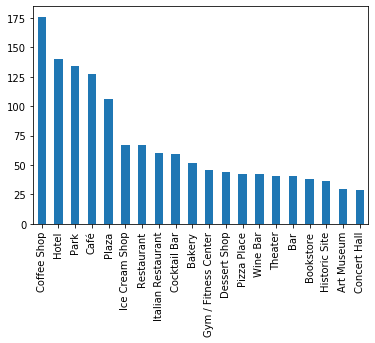

In [61]:
import matplotlib.pyplot as plt
ven_cat = venues['Venue Category'].value_counts()
categories = ven_cat.to_frame().head(20)
categories['Venue Category'].plot(kind='bar')
plt.show()

## SEE THE NUMBER OF VENUES RETURNED FOR EACH CITY

In [62]:
venues.groupby('City').count()

,City Latitude,City Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
City,,,,,,
Barcelona,100,100,100,100,100,100
Belgrade,100,100,100,100,100,100
Berlin,100,100,100,100,100,100
Birmingham,100,100,100,100,100,100
Brussels,100,100,100,100,100,100
Bucharest,100,100,100,100,100,100
Budapest,100,100,100,100,100,100
Cologne,100,100,100,100,100,100
Hamburg,100,100,100,100,100,100


In [137]:
onehot = pd.get_dummies(venues[['Venue Category']], prefix="", prefix_sep="")
onehot['City'] = venues['City']
fixed_columns = [onehot.columns[-1]] + list(onehot.columns[:-1])
onehot = onehot[fixed_columns]
onehot

,City,Accessories Store,Afghan Restaurant,African Restaurant,American Restaurant,Amphitheater,Antique Shop,Aquarium,Arcade,Argentinian Restaurant,...,Water Park,Waterfall,Waterfront,Whisky Bar,Wine Bar,Wine Shop,Winery,Women's Store,Yoga Studio,Zoo
0,Istanbul,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Istanbul,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Istanbul,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Istanbul,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Istanbul,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3061,Odessa,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3062,Odessa,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3063,Odessa,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3064,Odessa,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


## GET THE VENUES FREQUENCY MEAN 

In [64]:
grouped = onehot.groupby('City').mean().reset_index()

In [65]:
grouped

,City,Accessories Store,Afghan Restaurant,African Restaurant,American Restaurant,Amphitheater,Antique Shop,Aquarium,Arcade,Argentinian Restaurant,...,Water Park,Waterfall,Waterfront,Whisky Bar,Wine Bar,Wine Shop,Winery,Women's Store,Yoga Studio,Zoo
0,Barcelona,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000000,0.00,0.000000,0.00,0.040000,0.02,0.00,0.000000,0.000000,0.000000
1,Belgrade,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.01,0.00,...,0.000000,0.00,0.000000,0.00,0.030000,0.00,0.00,0.000000,0.000000,0.000000
2,Berlin,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000000,0.01,0.020000,0.00,0.030000,0.00,0.00,0.000000,0.010000,0.000000
3,Birmingham,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.01,...,0.000000,0.00,0.000000,0.00,0.000000,0.01,0.00,0.000000,0.000000,0.010000
4,Brussels,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000000,0.00,0.000000,0.00,0.010000,0.00,0.00,0.000000,0.010000,0.000000
5,Bucharest,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000000,0.00,0.000000,0.00,0.010000,0.00,0.00,0.000000,0.000000,0.000000
6,Budapest,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,...,0.000000,0.00,0.010000,0.01,0.000000,0.01,0.00,0.000000,0.000000,0.000000
7,Cologne,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000000,0.00,0.010000,0.00,0.010000,0.00,0.00,0.000000,0.000000,0.010000
8,Hamburg,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000000,0.00,0.000000,0.00,0.010000,0.00,0.00,0.000000,0.000000,0.000000
9,Istanbul,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.00,...,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.00,0.000000,0.000000,0.000000


## SHOW THE MOST COMMON VENUES OF EACH CITY

In [66]:
import numpy as np

In [67]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    return row_categories_sorted.index.values[0:num_top_venues]

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

columns = ['City']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

venues_sorted = pd.DataFrame(columns=columns)
venues_sorted['City'] = grouped['City']

for ind in np.arange(grouped.shape[0]):
    venues_sorted.iloc[ind, 1:] = return_most_common_venues(grouped.iloc[ind, :], num_top_venues)

venues_sorted

,City,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Barcelona,Hotel,Park,Plaza,Wine Bar,Bakery,Historic Site,Thai Restaurant,Café,Mediterranean Restaurant,Tapas Restaurant
1,Belgrade,Park,Coffee Shop,Ice Cream Shop,Cocktail Bar,Bar,Dessert Shop,Hotel,Theater,Pedestrian Plaza,Wine Bar
2,Berlin,Coffee Shop,Park,Bookstore,Ice Cream Shop,Concert Hall,Bakery,Monument / Landmark,Hotel,Wine Bar,Waterfront
3,Birmingham,Pub,Bar,Indian Restaurant,Coffee Shop,Hotel,Restaurant,Hookah Bar,Music Venue,Café,Concert Hall
4,Brussels,Bar,Hotel,Concert Hall,Coffee Shop,Plaza,Sandwich Place,Seafood Restaurant,Chocolate Shop,Brewery,Italian Restaurant
5,Bucharest,Coffee Shop,Dessert Shop,Burger Joint,Park,Hotel,Italian Restaurant,Gym / Fitness Center,Pizza Place,Pub,Ice Cream Shop
6,Budapest,Coffee Shop,Bakery,Hotel,Ice Cream Shop,Park,Breakfast Spot,Dessert Shop,Pizza Place,Indie Movie Theater,Italian Restaurant
7,Cologne,Café,Park,Coffee Shop,Italian Restaurant,Ice Cream Shop,Plaza,Hotel,Pedestrian Plaza,French Restaurant,Burger Joint
8,Hamburg,Café,Park,Coffee Shop,Pizza Place,Ice Cream Shop,Hotel,Supermarket,Restaurant,Vietnamese Restaurant,Farmers Market
9,Istanbul,Café,Historic Site,Coffee Shop,Hotel,History Museum,Art Gallery,Hookah Bar,Mosque,Plaza,Breakfast Spot


## CLUSTER CITIES INTO THREE DIFFERENT GROUPS

## It runed a couple of times so it shows the error for multiple insterting the same column

In [68]:
from sklearn.cluster import KMeans

In [112]:
kclusters = 3

grouped_clustering = grouped.drop('City', 1)

kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(grouped_clustering)

kmeans.labels_[0:5] 

array([2, 0, 0, 0, 2], dtype=int32)

In [113]:
venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

ValueError: cannot insert Cluster Labels, already exists

In [114]:
merged = cities

merged = merged.join(venues_sorted.set_index('City'), on='City')

merged

,Rank,City,Country,Population,latitude,longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,1,Istanbul,Turkey,15519267,41.009633,28.965165,0.0,Café,Historic Site,Coffee Shop,Hotel,History Museum,Art Gallery,Hookah Bar,Mosque,Plaza,Breakfast Spot
1,2,Moscow,Russia,12615279,55.479205,37.327330,0.0,Park,Supermarket,Café,Restaurant,Convenience Store,Soccer Field,Farmers Market,Shopping Mall,Big Box Store,Rest Area
2,3,London,United Kingdom,9126366,51.507322,-0.127647,2.0,Hotel,Cocktail Bar,Theater,Clothing Store,Hotel Bar,Park,Lounge,History Museum,Art Museum,Food Court
3,4,Saint Petersburg,Russia,5383890,59.960674,30.158655,0.0,Bakery,Salon / Barbershop,Park,Hookah Bar,Beach,Arcade,Boutique,Theme Park,Beer Store,Gym / Fitness Center
4,5,Berlin,Germany,3748148,52.517037,13.388860,0.0,Coffee Shop,Park,Bookstore,Ice Cream Shop,Concert Hall,Bakery,Monument / Landmark,Hotel,Wine Bar,Waterfront
5,6,Madrid,Spain,3223334,40.416705,-3.703582,2.0,Plaza,Hotel,Restaurant,Tapas Restaurant,Spanish Restaurant,Bookstore,Art Museum,Café,Theater,Coffee Shop
6,7,Kiev,Ukraine,2950800,50.450034,30.524136,0.0,Coffee Shop,Park,Tatar Restaurant,Wine Bar,Dessert Shop,Bakery,Historic Site,Church,Theater,Health & Beauty Service
7,8,Rome,Italy,2844750,41.893320,12.482932,2.0,Ice Cream Shop,Pizza Place,Italian Restaurant,Plaza,Sandwich Place,Historic Site,Park,Scenic Lookout,Monument / Landmark,Temple
8,9,Paris,France,2140526,48.856697,2.351462,2.0,Plaza,Wine Bar,French Restaurant,Bookstore,Italian Restaurant,Art Museum,Cocktail Bar,Garden,Hotel,Sandwich Place
9,10,Bucharest,Romania,2106144,44.436141,26.102720,0.0,Coffee Shop,Dessert Shop,Burger Joint,Park,Hotel,Italian Restaurant,Gym / Fitness Center,Pizza Place,Pub,Ice Cream Shop


## WE MUST REFINE OUR DATA. WE SAW FROM THE FIRST MAP THAT THE PROGRAM DIDN'T GAVE US THE RIGHT COORDINATES FOR SOFIA, BULGARIA. WE'LL REMOVE IT FROM THE DATAFRAME, AS WELL AS VORONEZH, RUSSIA AND VOLGOGRAD, RUSSIA THAT DOESN'T HAVE ENOUGH VENUES IN THE CITY CENTER FOR QUALITY PROCESSING.

In [115]:
merged = merged.dropna()

In [116]:
merged = merged.drop([30])
merged = merged.drop([31])
merged = merged.drop([33])

## WE CAN SEE OUR FINAL DATASET

In [117]:
merged

,Rank,City,Country,Population,latitude,longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,1,Istanbul,Turkey,15519267,41.009633,28.965165,0.0,Café,Historic Site,Coffee Shop,Hotel,History Museum,Art Gallery,Hookah Bar,Mosque,Plaza,Breakfast Spot
1,2,Moscow,Russia,12615279,55.479205,37.327330,0.0,Park,Supermarket,Café,Restaurant,Convenience Store,Soccer Field,Farmers Market,Shopping Mall,Big Box Store,Rest Area
2,3,London,United Kingdom,9126366,51.507322,-0.127647,2.0,Hotel,Cocktail Bar,Theater,Clothing Store,Hotel Bar,Park,Lounge,History Museum,Art Museum,Food Court
3,4,Saint Petersburg,Russia,5383890,59.960674,30.158655,0.0,Bakery,Salon / Barbershop,Park,Hookah Bar,Beach,Arcade,Boutique,Theme Park,Beer Store,Gym / Fitness Center
4,5,Berlin,Germany,3748148,52.517037,13.388860,0.0,Coffee Shop,Park,Bookstore,Ice Cream Shop,Concert Hall,Bakery,Monument / Landmark,Hotel,Wine Bar,Waterfront
5,6,Madrid,Spain,3223334,40.416705,-3.703582,2.0,Plaza,Hotel,Restaurant,Tapas Restaurant,Spanish Restaurant,Bookstore,Art Museum,Café,Theater,Coffee Shop
6,7,Kiev,Ukraine,2950800,50.450034,30.524136,0.0,Coffee Shop,Park,Tatar Restaurant,Wine Bar,Dessert Shop,Bakery,Historic Site,Church,Theater,Health & Beauty Service
7,8,Rome,Italy,2844750,41.893320,12.482932,2.0,Ice Cream Shop,Pizza Place,Italian Restaurant,Plaza,Sandwich Place,Historic Site,Park,Scenic Lookout,Monument / Landmark,Temple
8,9,Paris,France,2140526,48.856697,2.351462,2.0,Plaza,Wine Bar,French Restaurant,Bookstore,Italian Restaurant,Art Museum,Cocktail Bar,Garden,Hotel,Sandwich Place
9,10,Bucharest,Romania,2106144,44.436141,26.102720,0.0,Coffee Shop,Dessert Shop,Burger Joint,Park,Hotel,Italian Restaurant,Gym / Fitness Center,Pizza Place,Pub,Ice Cream Shop


## WE MUST TRANSFORM THE 'CLUSTER LABELS' COLUMN FROM FLOAT TO INTEGERS SO WE CAN USE ITS DATA FOR THE MAP DRAWING

In [118]:
merged['Cluster Labels'] = merged['Cluster Labels'].astype(int)

## NOW WE CAN DRAW THE EUROPEAN MAP, CLUSTERED WITH THREE DIFFERENT COLORS, EACH OF THEM SHOWING THE SIMILARITY IN THE CONTENTS THAT CAN BE FIND AT THE CENTER OF EACH CITY

In [119]:
import matplotlib.cm as cm
import matplotlib.colors as colors

In [120]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=3.5)

x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

markers_colors = []
for lat, lon, poi, cluster in zip(
        merged['latitude'], 
        merged['longitude'], 
        merged['City'], 
        merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## WE EXAMINE EACH COLORED CLUSTERS.

## FIRST ONE IS THE RED ONE

In [270]:
merged.loc[merged['Cluster Labels'] == 0, merged.columns[[1] + list(range(3, merged.shape[1]))]]

,City,Population,latitude,longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Istanbul,15519267,41.009633,28.965165,0,Café,Historic Site,Coffee Shop,Hotel,History Museum,Art Gallery,Hookah Bar,Mosque,Plaza,Breakfast Spot
1,Moscow,12615279,55.479205,37.327330,0,Park,Supermarket,Café,Restaurant,Convenience Store,Soccer Field,Farmers Market,Shopping Mall,Big Box Store,Rest Area
3,Saint Petersburg,5383890,59.960674,30.158655,0,Bakery,Salon / Barbershop,Park,Hookah Bar,Beach,Arcade,Boutique,Theme Park,Beer Store,Gym / Fitness Center
4,Berlin,3748148,52.517037,13.388860,0,Coffee Shop,Park,Bookstore,Ice Cream Shop,Concert Hall,Bakery,Monument / Landmark,Hotel,Wine Bar,Waterfront
6,Kiev,2950800,50.450034,30.524136,0,Coffee Shop,Park,Tatar Restaurant,Wine Bar,Dessert Shop,Bakery,Historic Site,Church,Theater,Health & Beauty Service
9,Bucharest,2106144,44.436141,26.102720,0,Coffee Shop,Dessert Shop,Burger Joint,Park,Hotel,Italian Restaurant,Gym / Fitness Center,Pizza Place,Pub,Ice Cream Shop
10,Minsk,1982444,53.902334,27.561879,0,Coffee Shop,Bar,Restaurant,Cocktail Bar,Park,French Restaurant,Café,Plaza,Spa,Italian Restaurant
11,Hamburg,1930996,53.543764,10.009913,0,Café,Park,Coffee Shop,Pizza Place,Ice Cream Shop,Hotel,Supermarket,Restaurant,Vietnamese Restaurant,Farmers Market
13,Warsaw,1802237,52.233717,21.071411,0,Café,Park,Dessert Shop,Sushi Restaurant,Cocktail Bar,Gym / Fitness Center,Restaurant,Polish Restaurant,Soccer Stadium,Beer Bar
14,Budapest,1768073,47.498382,19.040471,0,Coffee Shop,Bakery,Hotel,Ice Cream Shop,Park,Breakfast Spot,Dessert Shop,Pizza Place,Indie Movie Theater,Italian Restaurant


## SECOND IS THE TURQUOISE ONE

In [271]:
merged.loc[merged['Cluster Labels'] == 2, merged.columns[[1] + list(range(3, merged.shape[1]))]]

,City,Population,latitude,longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,London,9126366,51.507322,-0.127647,2,Hotel,Cocktail Bar,Theater,Clothing Store,Hotel Bar,Park,Lounge,History Museum,Art Museum,Food Court
5,Madrid,3223334,40.416705,-3.703582,2,Plaza,Hotel,Restaurant,Tapas Restaurant,Spanish Restaurant,Bookstore,Art Museum,Café,Theater,Coffee Shop
7,Rome,2844750,41.893320,12.482932,2,Ice Cream Shop,Pizza Place,Italian Restaurant,Plaza,Sandwich Place,Historic Site,Park,Scenic Lookout,Monument / Landmark,Temple
8,Paris,2140526,48.856697,2.351462,2,Plaza,Wine Bar,French Restaurant,Bookstore,Italian Restaurant,Art Museum,Cocktail Bar,Garden,Hotel,Sandwich Place
12,Vienna,1899055,48.208354,16.372504,2,Hotel,Plaza,Ice Cream Shop,Austrian Restaurant,Park,Concert Hall,Café,Art Museum,Coffee Shop,Palace
15,Barcelona,1636762,41.382894,2.177432,2,Hotel,Park,Plaza,Wine Bar,Bakery,Historic Site,Thai Restaurant,Café,Mediterranean Restaurant,Tapas Restaurant
16,Munich,1471508,48.137108,11.575382,2,Café,Plaza,Ice Cream Shop,Beach,Hotel,Cocktail Bar,Coffee Shop,Gourmet Shop,Italian Restaurant,Beer Garden
18,Milan,1389834,45.466800,9.190500,2,Hotel,Boutique,Monument / Landmark,Plaza,Park,Italian Restaurant,Cocktail Bar,Ice Cream Shop,Seafood Restaurant,Art Gallery
24,Brussels,1211035,50.846557,4.351697,2,Bar,Hotel,Concert Hall,Coffee Shop,Plaza,Sandwich Place,Seafood Restaurant,Chocolate Shop,Brewery,Italian Restaurant
34,Odessa,1011494,46.487319,30.739278,2,Hotel,Coffee Shop,Plaza,Park,Café,Italian Restaurant,Dessert Shop,Wine Bar,Monument / Landmark,Restaurant


## TARGET GROUP IS THE ONE WITHOUT MANY CAFE BARS

## LETS EXCLUDE EVERYTHING BESIDES THE POPULATION, LONGITUDE AND CLUSTER LABEL FOR THE TARGET GROUP

In [273]:
group = merged.loc[merged['Cluster Labels'] == 2, merged.columns[[1] + list(range(3, merged.shape[1]))]]
group = group[['City', 'Population', 'longitude', 'Cluster Labels']]
group

,City,Population,longitude,Cluster Labels
2,London,9126366,-0.127647,2
5,Madrid,3223334,-3.703582,2
7,Rome,2844750,12.482932,2
8,Paris,2140526,2.351462,2
12,Vienna,1899055,16.372504,2
15,Barcelona,1636762,2.177432,2
16,Munich,1471508,11.575382,2
18,Milan,1389834,9.190500,2
24,Brussels,1211035,4.351697,2
34,Odessa,1011494,30.739278,2


## CREATE A DATAFRAME WITH THE LIST OF TARGET CONTENTS - COFFE SHOPS AND CAFE BARS

In [369]:
cs = venues[['City', 'Venue Category']]

In [275]:
cs_london = cs.loc[(cs['City'] == 'London') & (cs['Venue Category'] == 'Coffee Shop')]
cs_london_2 = cs.loc[(cs['City'] == 'London') & (cs['Venue Category'] == 'Café')]
cs_madrid = cs.loc[(cs['City'] == 'Madrid') & (cs['Venue Category'] == 'Coffee Shop')]
cs_madrid_2 = cs.loc[(cs['City'] == 'Madrid') & (cs['Venue Category'] == 'Café')]
cs_rome = cs.loc[(cs['City'] == 'Rome') & (cs['Venue Category'] == 'Coffee Shop')]
cs_rome_2 = cs.loc[(cs['City'] == 'Rome') & (cs['Venue Category'] == 'Café')]
cs_paris = cs.loc[(cs['City'] == 'Paris') & (cs['Venue Category'] == 'Coffee Shop')]
cs_paris_2 = cs.loc[(cs['City'] == 'Paris') & (cs['Venue Category'] == 'Café')]
cs_vienna = cs.loc[(cs['City'] == 'Vienna') & (cs['Venue Category'] == 'Coffee Shop')]
cs_vienna_2 = cs.loc[(cs['City'] == 'Vienna') & (cs['Venue Category'] == 'Café')]
cs_barcelona = cs.loc[(cs['City'] == 'Barcelona') & (cs['Venue Category'] == 'Coffee Shop')]
cs_barcelona_2 = cs.loc[(cs['City'] == 'Barcelona') & (cs['Venue Category'] == 'Café')]
cs_munich = cs.loc[(cs['City'] == 'Munich') & (cs['Venue Category'] == 'Coffee Shop')]
cs_munich_2 = cs.loc[(cs['City'] == 'Munich') & (cs['Venue Category'] == 'Café')]
cs_milan = cs.loc[(cs['City'] == 'Milan') & (cs['Venue Category'] == 'Coffee Shop')]
cs_milan_2 = cs.loc[(cs['City'] == 'Milan') & (cs['Venue Category'] == 'Café')]
cs_brussels = cs.loc[(cs['City'] == 'Brussels') & (cs['Venue Category'] == 'Coffee Shop')]
cs_brussels_2 = cs.loc[(cs['City'] == 'Brussels') & (cs['Venue Category'] == 'Café')]
cs_odessa = cs.loc[(cs['City'] == 'Odessa') & (cs['Venue Category'] == 'Coffee Shop')]
cs_odessa_2 = cs.loc[(cs['City'] == 'Odessa') & (cs['Venue Category'] == 'Café')]


In [276]:
sum_cs = [cs_london, cs_london_2, cs_madrid, cs_madrid_2, cs_rome, cs_rome_2, cs_paris, cs_paris_2, cs_vienna, cs_vienna_2, cs_barcelona, cs_barcelona_2, cs_munich, cs_munich_2, cs_milan, cs_milan_2, cs_brussels, cs_brussels_2, cs_odessa, cs_odessa_2]
sum_cshops = pd.concat(sum_cs)

In [278]:
sum_cshops.head()

,City,Venue Category
237,London,Coffee Shop
522,Madrid,Coffee Shop
554,Madrid,Coffee Shop
558,Madrid,Coffee Shop
499,Madrid,Café


## CREATE A BAR CHART AND A DATAFRAME TOO SEE WHICH CITY HAS THE SMALLEST AMOUNT OF COFFEE SHOPS AND CAFES

In [372]:
sum_cshops_cities = sum_cshops['City']
sum_cshops_cities.to_frame().head()
no_of_shops = sum_cshops_cities.value_counts().to_frame()

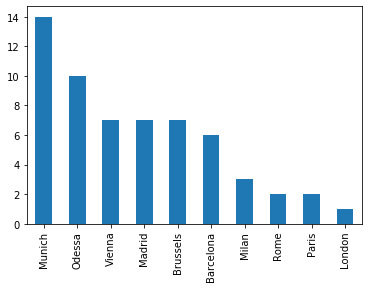

In [373]:
no_of_shops['City'].plot(kind='bar')
plt.show()

In [374]:
no_of_shops

,City
Munich,14
Odessa,10
Vienna,7
Madrid,7
Brussels,7
Barcelona,6
Milan,3
Rome,2
Paris,2
London,1


## WE CAN SEE THAT LONDON HAS THE LEAST NUMBER OF CAFE BARS IN THE LIST OF BIGGEST CITIES IN EUROPE